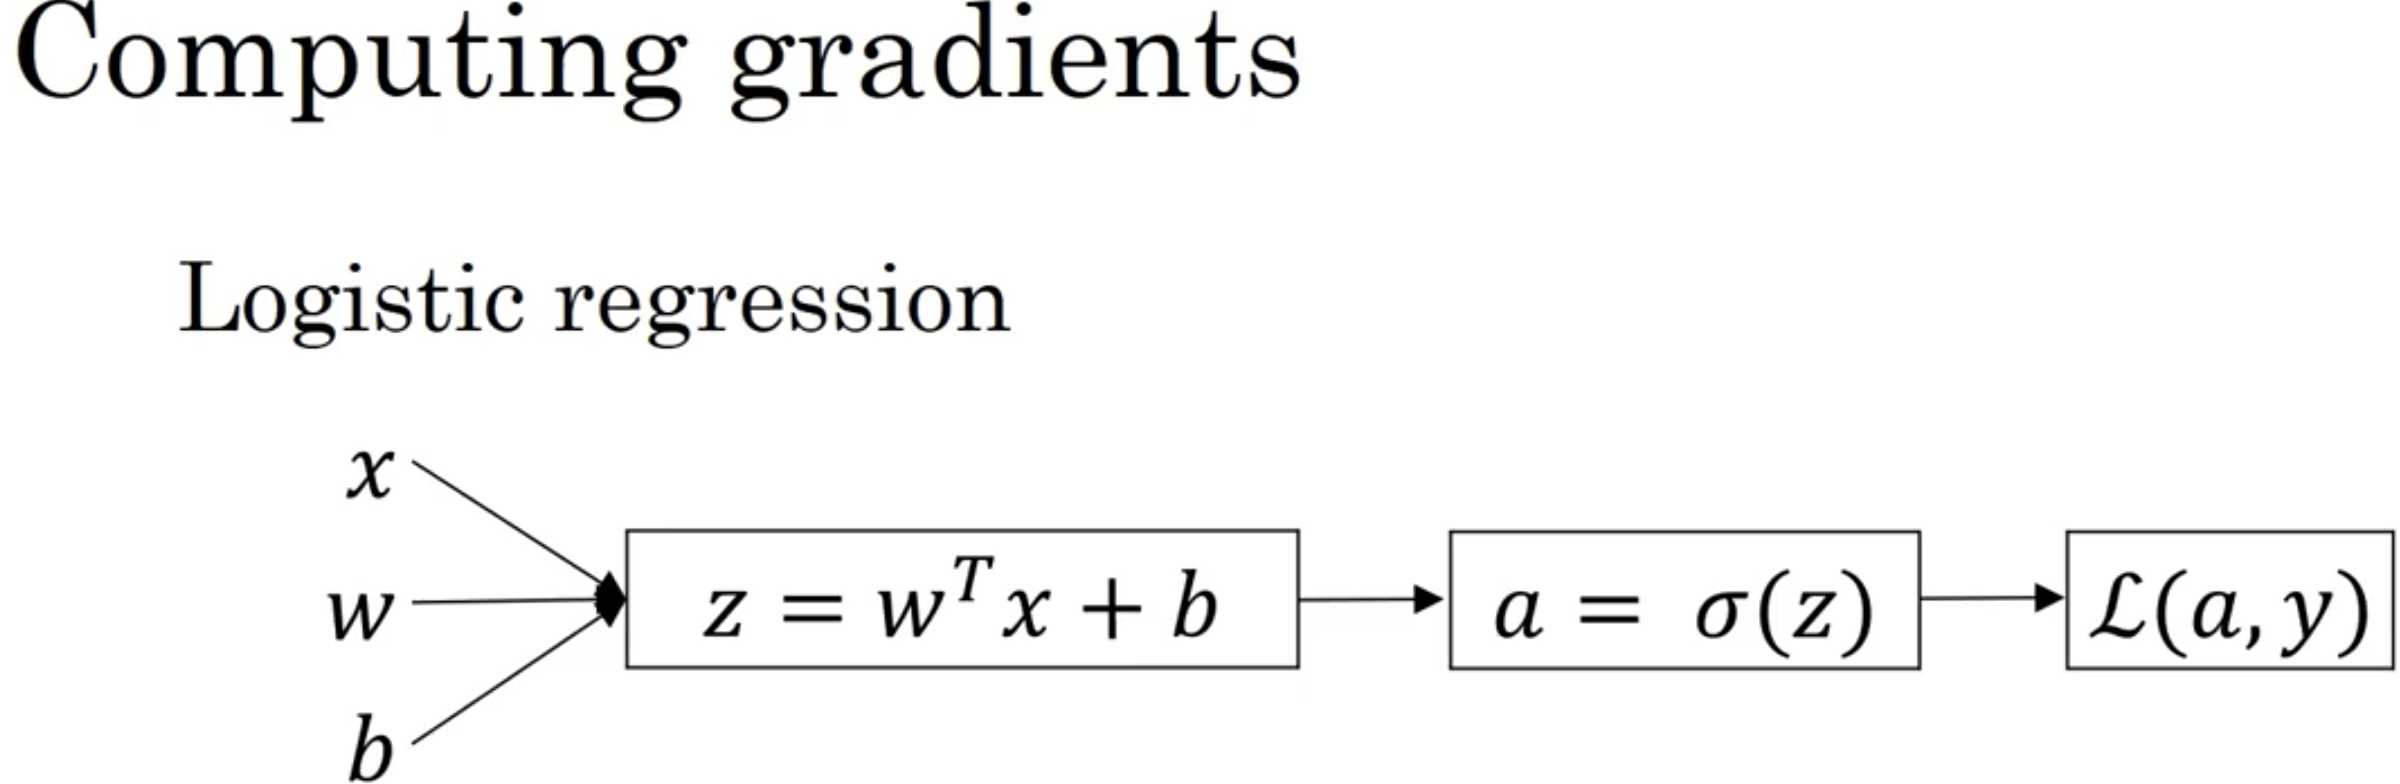

怎么和我理解的求导好像反了啊
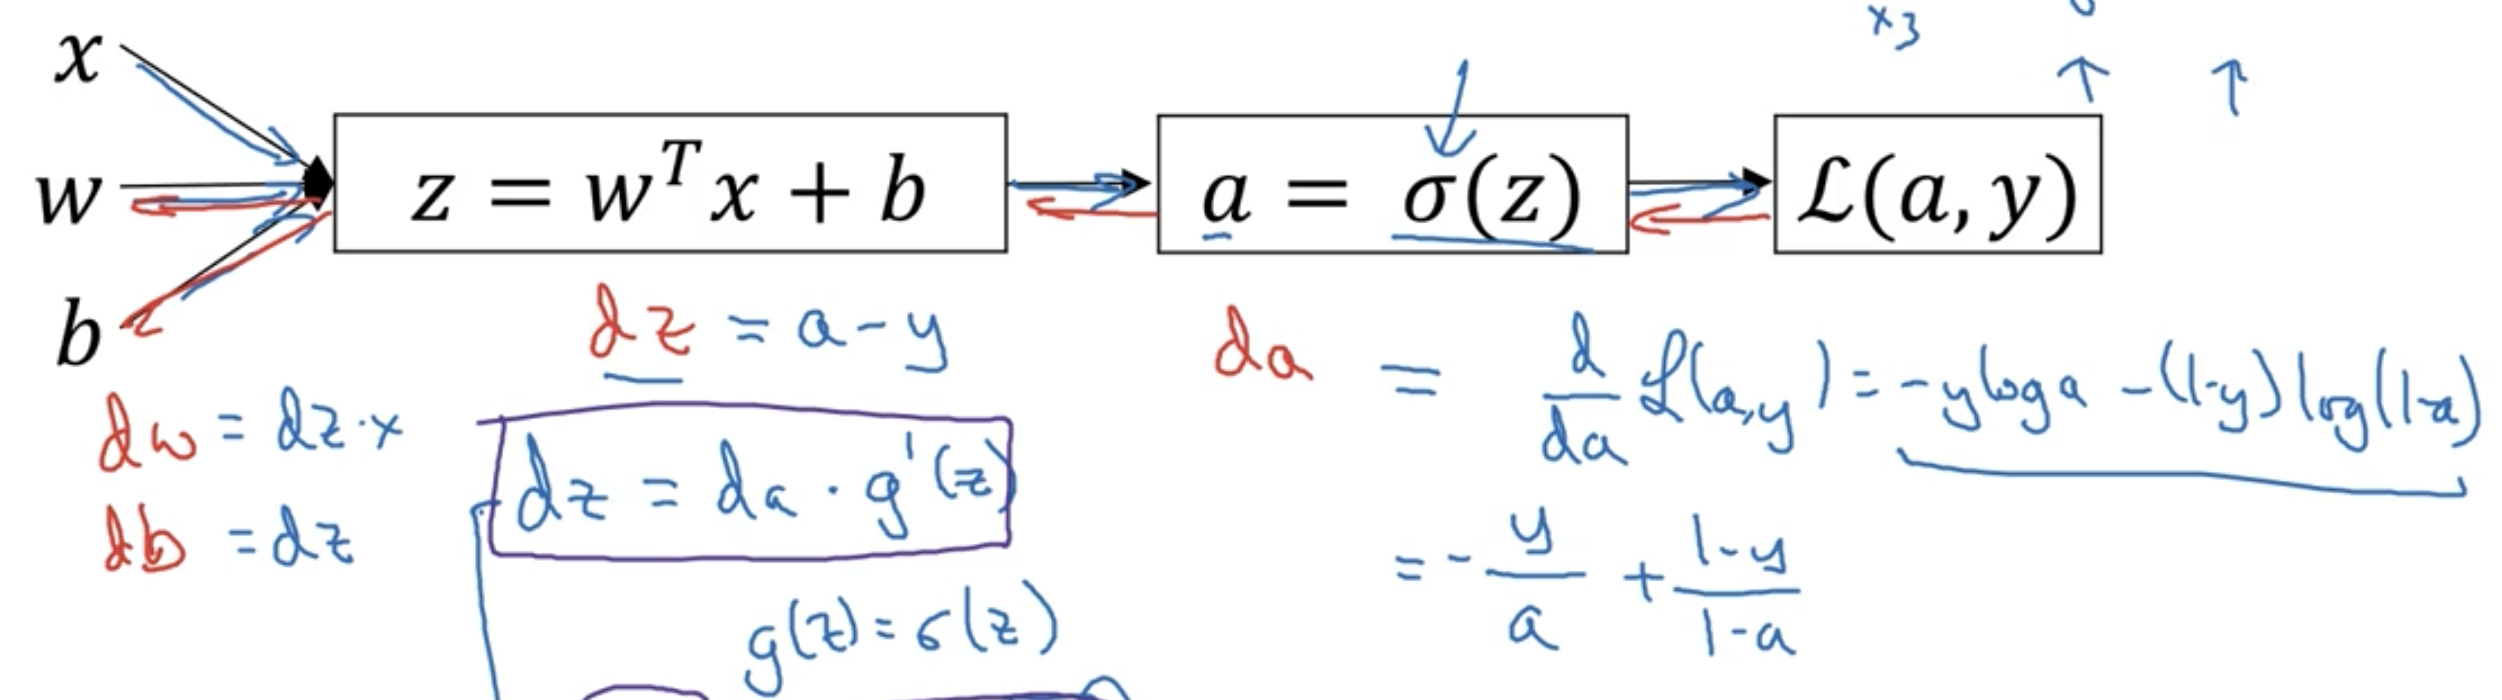

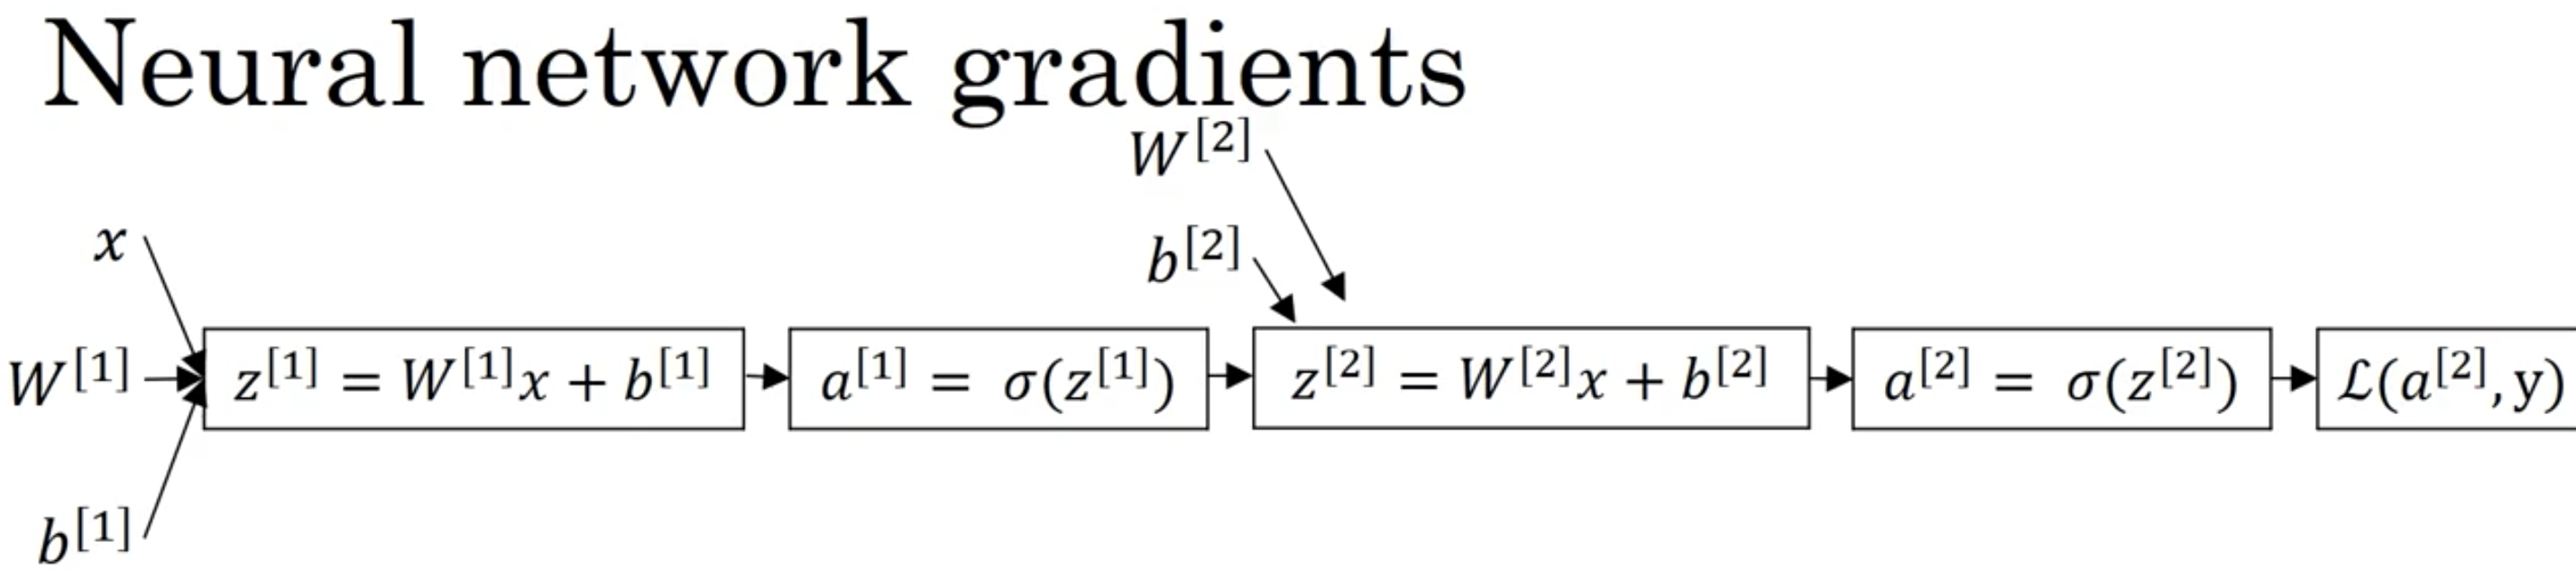

# LogisticRegression基础概念

对于一个样本X=[x0, x1, x2]  
其线性组合为：$$z = w0*x0 + w1*x1 + w2+x2 + b = W*X + b$$

## sigmoid函数
$$a=\sigma(z) = \frac{1}{1+e^{-z}}$$

## loss function
$$L(a, y)=-y*loga-(1-y)log(1-a)\\da=(-\frac{y}{a}+\frac{1-y}{1-a})=\frac{a-y}{a*(1-a))}\\dz=\sigma^\backprime(z)*da=a-y\\dw=x*dz$$

# LogisticRegression使用

## scikit learn LogisticRegression
```
LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='warn',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
)
```
### 处理非平衡数据
class_weight  
class_weight='balanced'

In [1]:
!pip freeze | grep scikit-learn

scikit-learn==0.21.3


In [1]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression(class_weight='balanced')

In [ ]:
LogisticRegression(class_weight={0:1,1:100})  # 标签0的权重是1， 标签1的权重是100

# LR手写实现
https://www.bilibili.com/video/av9912938/?p=34

初始问题：现在有一批数据，如下：  
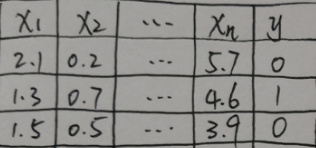

目的：希望用x来拟合y，求解最优参数W,b

In [ ]:
显然，直接使用线性回归WX+b是不行的，因为其值域为-∞,+∞， 那么就把其值域压到0,1;  
引入中间变量Z，令sigmoid(Z) = P(y=1)， 则 P(y=0)=1-P(y=1)

注：P(y=1)表示y=1的概率

## 求解：最大似然估计  
使得目前情况出现的可能性最大

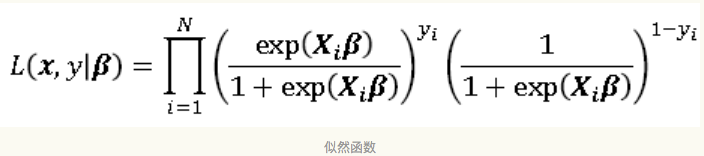

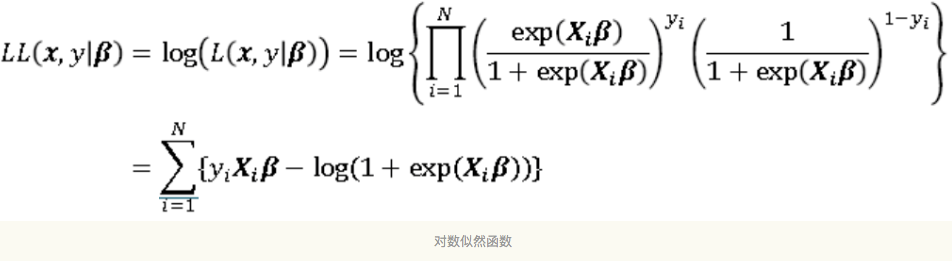

## 梯度上升法
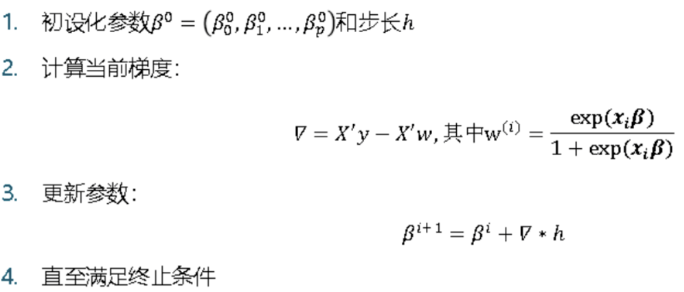

In [3]:
import numpy as np

In [9]:
def sigmoid_function(z):
    """
    sigmoid function or logistic function is used as a hypothesis function in classification problems
    """
    return 1 / (1 + np.exp(-z))

In [10]:
def cost_function(y_pred, y_true):
    """
    逻辑回归专用代价函数
    """
    return (-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)).mean()

In [5]:
loss = np.inf

In [6]:
loss - 4

inf

In [19]:
def logistic_reg(
    X,
    y,fit_intercept=True,
    lr=0.01, tol=1e-7, max_iter=1e7
    ):
    """
    X is the feature matrix, 每一行表示一个样本
    y is the target vector
    lr is the learning rate, 
    tol: tolerance
    """
    if fit_intercept:
        X = np.c_[np.ones(X.shape[0]), X]
    converged = False  # 收敛
    iterations = 0
    theta = np.zeros(X.shape[1])  # step1: 初始化参数向量
    loss = np.inf
    while not converged:
        # step1: forward
        z = np.dot(X, theta)
        h = sigmoid_function(z)
        # step2: backward 计算梯度
        gradient = np.dot(X.T, h - y) / y.size  
        # step3: 更新参数
        theta = theta - lr * gradient
        z = np.dot(X, theta)
        h = sigmoid_function(z)
        J = cost_function(h, y)
        if loss - J < tol:
            print(f'迭代次数：{iterations}; loss: {loss}')
            converged = True
        else:
            loss = J
        iterations += 1  # update iterations
    
        if iterations == max_iter:
            print ('Maximum iterations exceeded!')
            print ('Minimal cost function loss=', loss)
            converged = True
    return theta

In [7]:
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

In [13]:
theta = logistic_reg(X, y)

theta

迭代次数：1441; loss: 0.6834171095009753


array([0.24810399, 0.02403558, 0.14235192])

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

model.fit(X, y)

model.intercept_, model.coef_

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0.24752268]), array([[0.02555736, 0.14571902]]))

In [18]:
model.

array([2], dtype=int32)